Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)  
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety  
Разделите данные на выборку для обучения и тестирования  
Постройте модель LDA  
Визуализируйте предсказания для тестовой выборки и центры классов  
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width  
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [4]:
iris = load_iris()

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
data_class = iris.target
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
data1 = data[['sepal length (cm)', 'sepal width (cm)']]
data1

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [20]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1, data_class, test_size=0.3)

In [21]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [22]:
lda = LinearDiscriminantAnalysis()

In [23]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [24]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1,
       1])

In [25]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,1
1,2,1
2,1,1
3,1,1
4,0,0
5,0,0
6,2,2
7,2,2
8,0,0
9,1,1


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.8222222222222222

In [27]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-5.46951263,  6.96832744],
       [ 1.46405607, -3.33218169],
       [ 4.15948083, -3.65456781]])

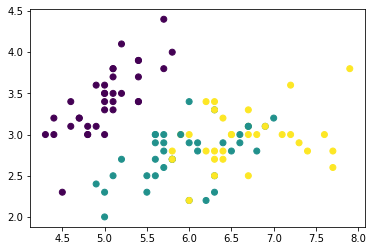

In [28]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [29]:
lda.means_

array([[5.01714286, 3.43142857],
       [5.94594595, 2.75405405],
       [6.63636364, 2.95454545]])

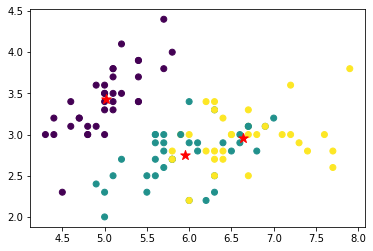

In [32]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=100, marker='*')

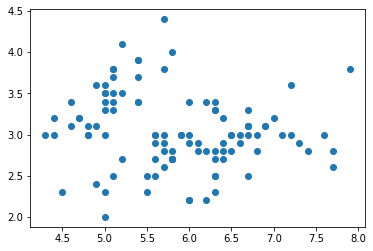

In [33]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'])

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

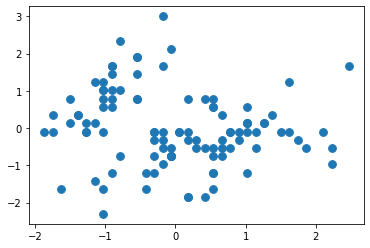

In [36]:
X_scaled = scaler.fit_transform(X_train)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [37]:
from sklearn.cluster import KMeans

In [40]:
k_inertia = []

ks = range(1, 30)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

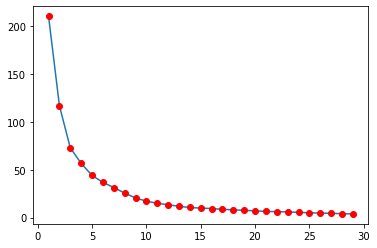

In [41]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [42]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 2, 0, 2, 1, 0, 0, 0, 3, 3, 0, 3, 0, 1, 3, 1, 3, 2, 1, 0, 2, 0,
       2, 0, 1, 1, 1, 1, 0, 3, 2, 1, 2, 0, 0, 2, 2, 0, 0, 3, 2, 1, 1, 3,
       0, 2, 2, 0, 0, 0, 2, 0, 3, 2, 0, 2, 2, 0, 0, 3, 0, 0, 2, 0, 0, 1,
       2, 0, 0, 3, 1, 2, 3, 0, 2, 1, 2, 2, 0, 2, 3, 0, 3, 1, 1, 3, 3, 1,
       0, 0, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 0])

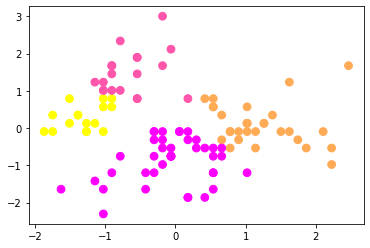

In [44]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='spring', c=clusters, s=60)